Total trajectories: 1


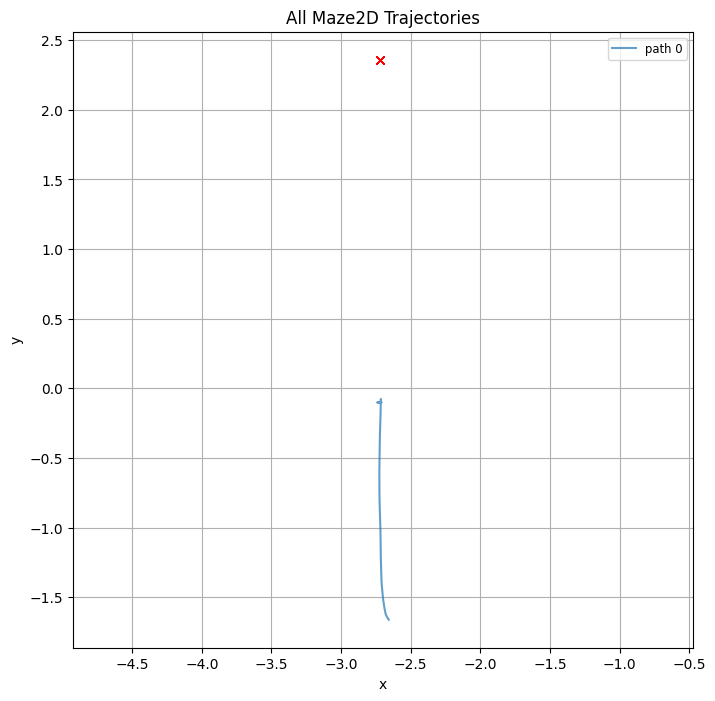

In [24]:
import minari
import numpy as np
import matplotlib.pyplot as plt

dataset = minari.load_dataset("test3-v1")
episodes = list(dataset.iterate_episodes())

print(f"Total trajectories: {len(episodes)}")

plt.figure(figsize=(8, 8))

for i, ep in enumerate(episodes):
    try:
        positions = np.array(ep.infos["qpos"])
        goals = np.array(ep.infos["goal"])

        plt.plot(*positions.T, label=f"path {i}", alpha=0.7)
        plt.plot(*goals.T, 'rx')
    except Exception as e:
        print(f"Skipping episode {i} due to error: {e}")

plt.axis("equal")
plt.title("All Maze2D Trajectories")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend(loc="best", fontsize="small", ncol=2)
plt.show()


In [26]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import numpy as np


episodes = list(dataset.iterate_episodes())

obs_list, action_list = [], []

for episode in episodes:
    obs_list.append(episode.observations)  # shape (T, obs_dim)
    action_list.append(episode.actions)    # shape (T, act_dim)

# ✅ Convert to tensors
obs_tensor = torch.tensor(np.concatenate(obs_list), dtype=torch.float32)
action_tensor = torch.tensor(np.concatenate(action_list), dtype=torch.float32)

# ✅ Build dataset & loader
maze_dataset = TensorDataset(obs_tensor, action_tensor)
dataloader = DataLoader(maze_dataset, batch_size=128, shuffle=True)

# ✅ Preview sample
for obs_batch, action_batch in dataloader:
    print("Observation Batch Shape:", obs_batch.shape)
    print("Action Batch Shape:", action_batch.shape)
    break

ValueError: zero-dimensional arrays cannot be concatenated

In [10]:
import d4rl
import gym

env = gym.make("maze2d-umaze-v1")  # will auto-download dataset
dataset = env.get_dataset()
print(dataset.keys())  # includes observations, actions, rewards, terminals, etc.


ModuleNotFoundError: No module named 'd4rl'

In [11]:
# Get the first episode
episode = dataset.episodes[0]

# Print basic episode details
print("Number of steps:", len(episode.observations))
print("First observation:", episode.observations[0])
print("First action:", episode.actions[0])
print("First reward:", episode.rewards[0])
print("Episode terminated?", episode.terminations[-1])

NameError: name 'dataset' is not defined